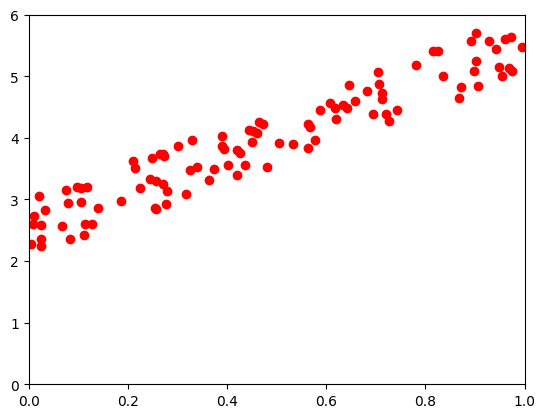

In [28]:
# Generate random linear regression data
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate random data
def generate_data():
    x = np.random.rand(100, 1)
    y = 2 + 3 * x + np.random.rand(100, 1)
    return x, y

# Plot the data
def plot_data(x, y):
    plt.plot(x, y, 'ro')
    plt.axis([0, 1, 0, 6])
    plt.show()
    
# Generate data
x, y = generate_data()

# Plot data
plot_data(x, y)

In [29]:
# Add x0 = 1 to each instance
X = np.c_[np.ones((100, 1)), x]
Y = y

# Initialize theta randomly
theta = np.random.randn(2, 1)

print(theta)

[[ 0.6605458 ]
 [-0.24354259]]


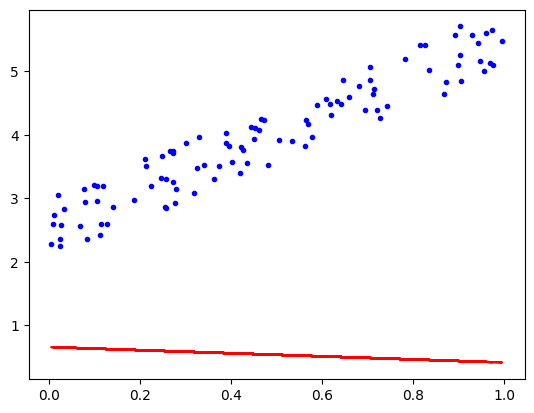

In [30]:
# plot the original data
plt.plot(x, y, "b.")
# Plot the predicted values using X and theta
y_predict = X.dot(theta)
plt.plot(x, y_predict, "r-")
plt.show()

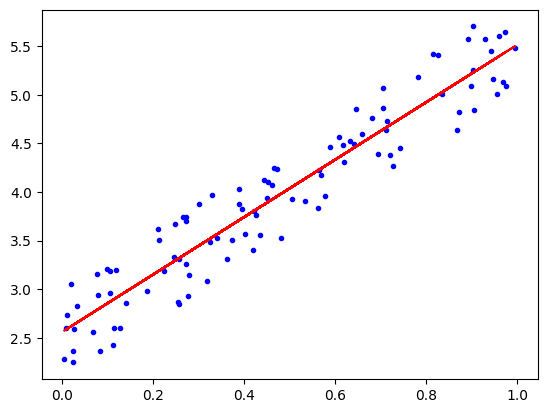

In [31]:
# calculate theta using OLS
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# plot the original data
plt.plot(x, y, "b.")
# Plot the predicted values using X and theta
y_predict_ols = X.dot(theta_best)
plt.plot(x, y_predict_ols, "r-")
plt.show()

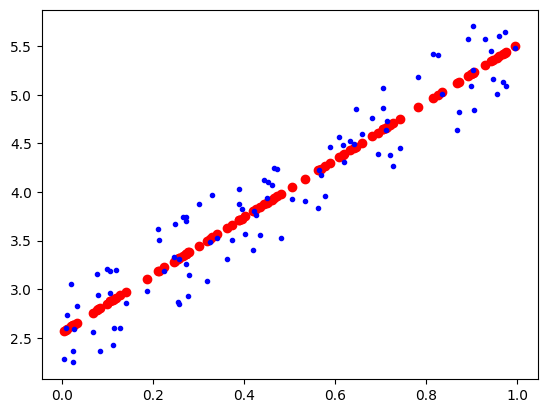

In [32]:
degree = 1  # For example, a 10th degree polynomial

# Create a complex X matrix with higher degree terms
X = np.ones((len(x), 1))
for i in range(1, degree + 1):
    X = np.c_[X, x**i]

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# plot the original data
plt.plot(x, y, "b.")

# Plot the predicted values using X and theta
y_predict_ols = X.dot(theta_best)
plt.scatter(x, y_predict_ols, color='r')
plt.show()

(100, 3)
[[3.21309454]
 [0.97289773]
 [0.89178946]]
(3, 1)


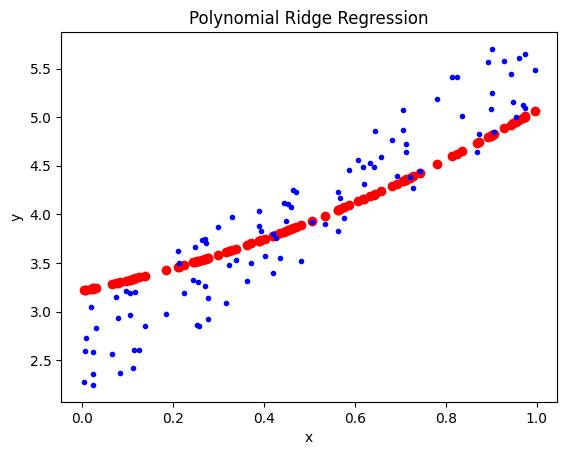

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data (assuming x and y are already defined)
degree = 2  # For example, a 10th degree polynomial

# Create a complex X matrix with higher degree terms
X = np.ones((len(x), 1))
for i in range(1, degree + 1):
    X = np.c_[X, x**i]
    
print(X.shape)

# Ridge Regression (excluding the intercept from regularization)
def ridge_regression(X, Y, alpha):
    m, n = X.shape
    I = np.identity(n)
    return np.linalg.inv(X.T.dot(X) + m * alpha * I).dot(X.T).dot(Y)

# Define alpha for ridge regression
alpha = 0.1  # Example value

# Apply ridge regression
theta_best_ridge = ridge_regression(X, y, alpha)
print(theta_best_ridge)
print(theta_best_ridge.shape)

# Plot the original data
plt.plot(x, y, "b.")

# Plot the predicted values using X and theta
y_predict_ridge = X.dot(theta_best_ridge)
plt.scatter(x, y_predict_ridge, color='r')
plt.title("Polynomial Ridge Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

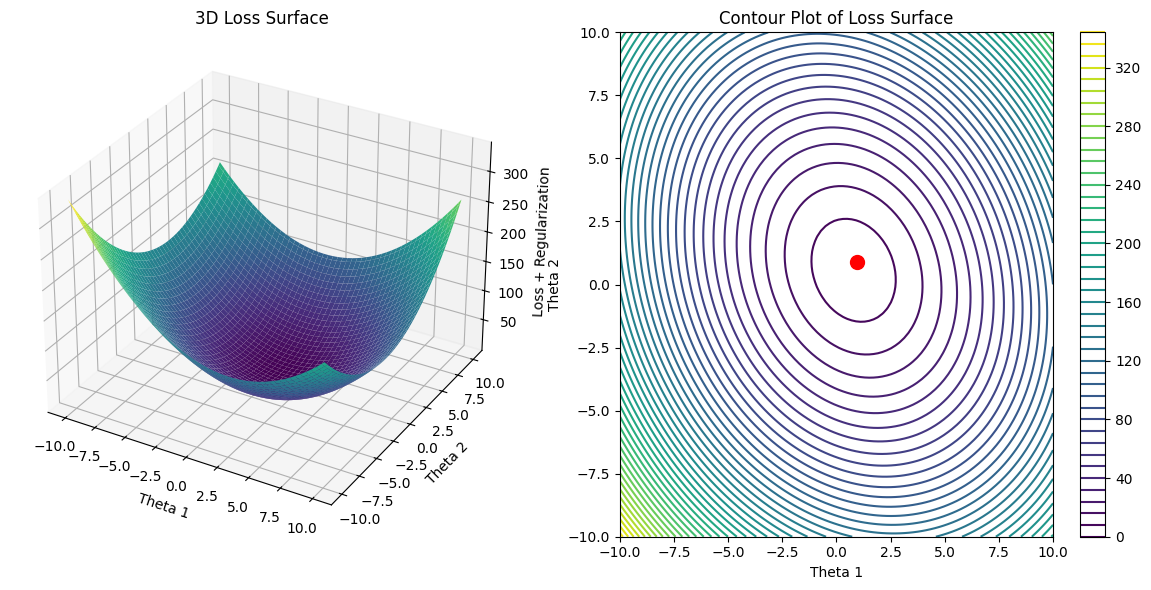

In [67]:
# Define a range for the coefficients (theta1 and theta2)
theta1_range = np.linspace(-10, 10, 100)
theta2_range = np.linspace(-10, 10, 100)

# Initialize matrix to store the loss values
loss_values = np.zeros((len(theta1_range), len(theta2_range)))

# Regularization parameter
alpha = 1

# Compute loss for each combination of coefficients
for i, theta1 in enumerate(theta1_range):
    for j, theta2 in enumerate(theta2_range):
        theta = np.array([[2], [theta1], [theta2]])  # Assume 0 for intercept
        predictions = X.dot(theta)
        mse = np.mean((predictions - Y) ** 2)
        regularization = alpha * (np.sum(theta[1:] ** 2))  # L2 norm, excluding intercept
        loss_values[i, j] = mse + regularization

# Plot
theta1_grid, theta2_grid = np.meshgrid(theta1_range, theta2_range)
fig = plt.figure(figsize=(12, 6))

# 3D plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(theta1_grid, theta2_grid, loss_values.T, cmap='viridis')
ax.set_xlabel('Theta 1')
ax.set_ylabel('Theta 2')
ax.set_zlabel('Loss + Regularization')
ax.set_title('3D Loss Surface')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(theta1_grid, theta2_grid, loss_values.T, levels=50, cmap='viridis')
ax.set_xlabel('Theta 1')
ax.set_ylabel('Theta 2')
ax.set_title('Contour Plot of Loss Surface')
plt.colorbar(contour)

# PLot theta_best_ridge on the loss surface
theta1 = theta_best_ridge[1]
theta2 = theta_best_ridge[2]
ax.plot([theta1], [theta2], marker='o', markersize=10, color="red")

plt.tight_layout()
plt.show()